In [56]:
# packages : numpy, pandas, sklearn, matplotlib, seaborn, scikit-learn, graphviz
# they are all necessary for the following code

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree


from sklearn.ensemble import RandomForestClassifier

In [57]:
# actual datasets should implement in 'signal.csv'.
dataset = pd.read_csv('signal.csv')
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values


0 R^2 score: 1.0
1 R^2 score: 1.0
2 R^2 score: 1.0
3 R^2 score: 0.99
4 R^2 score: 0.99
5 R^2 score: 0.99
6 R^2 score: 0.99
7 R^2 score: 0.98
8 R^2 score: 0.98
9 R^2 score: 0.98


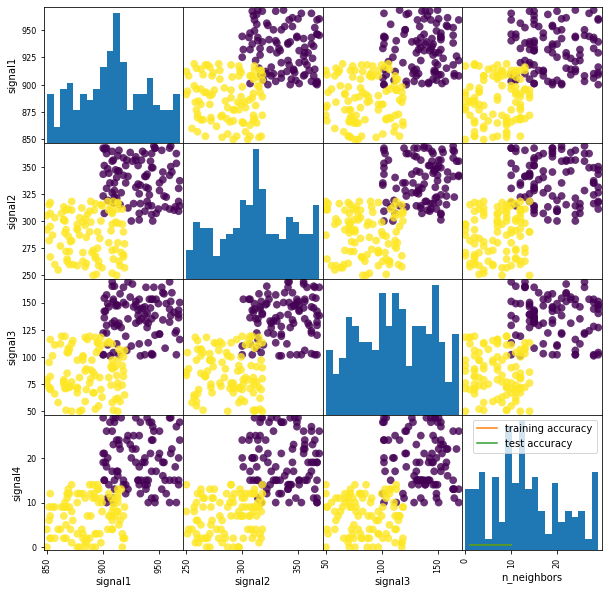

In [68]:
def knn_finder(X,y):
    training_accuracy = []
    test_accuracy = []
    max = []
    neighbors_settings = range(1, 11)

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train, y_train))
        test_accuracy.append(clf.score(X_test, y_test))
    plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
    plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.legend()
    
    for n in range(10):
        max.append(training_accuracy[n] * 0.7 + test_accuracy[n] * 0.3)
    return np.argmax(max) + 1
def knn_predict(X,y):
    neighbors_settings = range(1, 11)
    r2 = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    for n_neighbors in neighbors_settings:
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)
        r2.append(reg.score(X_test, y_test))
    for n in range(10):    
        print(f"{n} R^2 score: {r2[n].round(2)}")

    
scatter_matrix(dataset.iloc[:, 0:4],c=y,figsize=(10,10),marker ='o',
                       hist_kwds={'bins':20},s=60,alpha=.8);
                      
knn_finder(X,y)
knn_predict(X,y)


In [59]:
def knn_algorithm(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf = KNeighborsClassifier(n_neighbors=2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Test set predictions: {}".format(clf.predict(X_test)))
    print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
    
    return clf
knn_algorithm(X,y).predict([[920,280,180,6]])

Test set predictions: [0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1]
Test set accuracy: 1.00


array([0], dtype=int64)

DecisionTreeClassifier(max_depth=9, random_state=0)

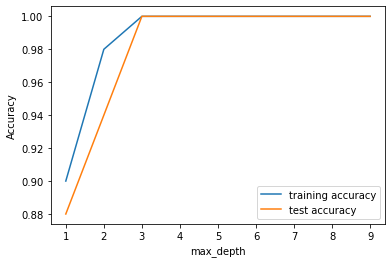

In [60]:
def treeAlgorithm(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    training_score = []
    test_score = []
    for i in range(1,10):
        tree = DecisionTreeClassifier(max_depth=i,random_state=0)
        tree.fit(X_train, y_train)
        test_score.append(tree.score(X_test, y_test))
        training_score.append(tree.score(X_train, y_train))
    plt.plot(range(1,10), training_score, label="training accuracy")
    plt.plot(range(1,10), test_score, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("max_depth")
    plt.legend()
    return tree
def RandomForestAlgorithm(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    training_score = []
    test_score = []
    for i in range(1,10):
        forest = RandomForestClassifier(max_depth=i,random_state=0)
        forest.fit(X_train, y_train)
        test_score.append(forest.score(X_test, y_test))
        training_score.append(forest.score(X_train, y_train))
    plt.plot(range(1,10), training_score, label="training accuracy")
    plt.plot(range(1,10), test_score, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("max_depth")
    plt.legend()
    return forest

treeAlgorithm(X,y)

RandomForestClassifier(max_depth=9, random_state=0)

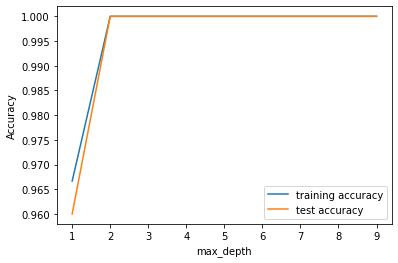

In [61]:
RandomForestAlgorithm(X,y)

Feature importances:
[0.07692308 0.         0.66666667 0.25641026]


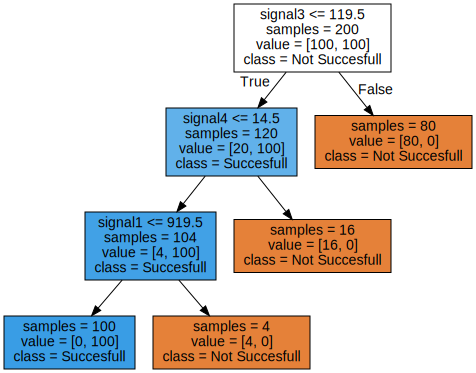

In [62]:
Dec_tree = DecisionTreeClassifier(max_depth=3,random_state=0)
Dec_tree.fit(X,y)
export_graphviz(Dec_tree, out_file="tree.dot", class_names=["Not Succesfull", "Succesfull"],
 feature_names=dataset.columns[0:4], impurity=False, filled=True)
print("Feature importances:\n{}".format(Dec_tree.feature_importances_))
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)


Feature importances:
[0.11181933 0.23433801 0.34902863 0.30481402]


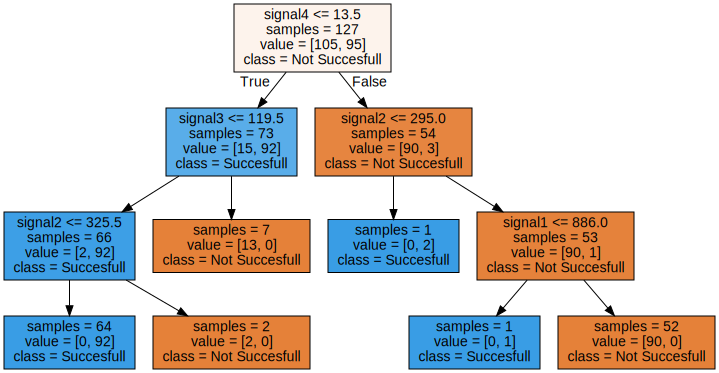

In [63]:
Forest_tree = RandomForestClassifier(max_depth=3,random_state=0)
Forest_tree.fit(X,y)
estimator = Forest_tree.estimators_[5]
export_graphviz(estimator, out_file="forest.dot", class_names=["Not Succesfull", "Succesfull"],
 feature_names=dataset.columns[0:4], impurity=False, filled=True)
print("Feature importances:\n{}".format(Forest_tree.feature_importances_))
import graphviz
with open("forest.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)


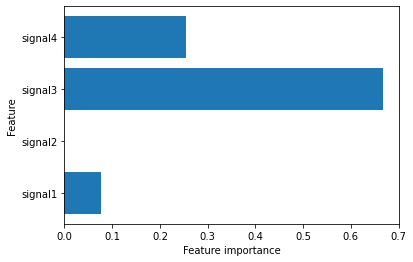

In [64]:
def feature_importance_tree(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    dec_tree = DecisionTreeClassifier(max_depth=3,random_state=0)
    dec_tree.fit(X_train, y_train)
    plt.barh(range(4), dec_tree.feature_importances_, align='center')
    plt.yticks(np.arange(4), dataset.columns[0:4])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

feature_importance_tree (X,y)

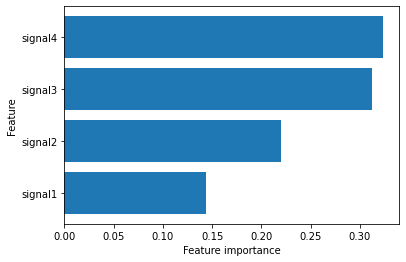

In [65]:
def feature_importance_forest(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    forest = RandomForestClassifier(max_depth=3,random_state=0)
    forest.fit(X_train, y_train)
    plt.barh(range(4), forest.feature_importances_, align='center')
    plt.yticks(np.arange(4), dataset.columns[0:4])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
feature_importance_forest(X,y)

Test set predictions: [0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1]
Test set accuracy: 1.00
Which ml algorithm do you want to use?
1. KNN
2. Decision Tree
3. Random Forest
You have selected KNN
Enter the values of the features:
The predicted value is: 
[1]


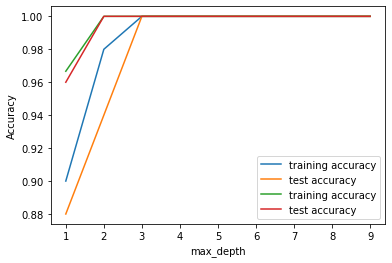

In [67]:
def predict(X,y):
    knn = knn_algorithm(X,y)
    tree = treeAlgorithm(X,y)
    forest = RandomForestAlgorithm(X,y)
    # take input from user
    print("Which ml algorithm do you want to use?")
    print("1. KNN")
    print("2. Decision Tree")
    print("3. Random Forest")
    choice = int(input("Enter choice: "))
    if choice == 1:
        print("You have selected KNN")
        print("Enter the values of the features:")
        x = int(input("Enter the value of signal1: "))
        y = int(input("Enter the value of signal2: "))
        z = int(input("Enter the value of signal3: "))
        w = int(input("Enter the value of signal4: "))
        print("The predicted value is: ")
        print(knn.predict([[x,y,z,w]]))
    elif choice == 2:
        print("You have selected Decision Tree")
        print("Enter the values of the features:")
        x = int(input("Enter the value of signal1: "))
        y = int(input("Enter the value of signal2: "))
        z = int(input("Enter the value of signal3: "))
        w = int(input("Enter the value of signal4: "))
        print("The predicted value is: ")
        print(tree.predict([[x,y,z,w]]))
    elif choice == 3:
        print("You have selected Random Forest")
        print("Enter the values of the features:")
        x = int(input("Enter the value of signal1: "))
        y = int(input("Enter the value of signal2: "))
        z = int(input("Enter the value of signal3: "))
        w = int(input("Enter the value of signal4: "))
        print("The predicted value is: ")
        print(forest.predict([[x,y,z,w]]))
    else:
        print("Invalid choice")
predict(X,y)